In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df.shape

(246, 14)

In [7]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


## Data Cleaning

In [8]:
df[df.isna().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(244, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

In [12]:
#creating new parameter called region as separating with 1st region as 0 and 2nd region as 1

df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.6+ KB


In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [15]:
df[['Region']] = df[['Region']].astype(int)

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [18]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [19]:
df =df.reset_index()


In [20]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [21]:
#removing the 122 row

df =df.drop(122).reset_index(drop=True)

In [22]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [23]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [24]:
#fixing spaces in columns name 

df.columns=df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        243 non-null    int64 
 1   day          243 non-null    object
 2   month        243 non-null    object
 3   year         243 non-null    object
 4   Temperature  243 non-null    object
 5   RH           243 non-null    object
 6   Ws           243 non-null    object
 7   Rain         243 non-null    object
 8   FFMC         243 non-null    object
 9   DMC          243 non-null    object
 10  DC           243 non-null    object
 11  ISI          243 non-null    object
 12  BUI          243 non-null    object
 13  FWI          243 non-null    object
 14  Classes      243 non-null    object
 15  Region       243 non-null    int32 
dtypes: int32(1), int64(1), object(14)
memory usage: 29.6+ KB


In [26]:
# Changing the required columns as integer data type

df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        243 non-null    int64 
 1   day          243 non-null    int32 
 2   month        243 non-null    int32 
 3   year         243 non-null    int32 
 4   Temperature  243 non-null    int32 
 5   RH           243 non-null    int32 
 6   Ws           243 non-null    int32 
 7   Rain         243 non-null    object
 8   FFMC         243 non-null    object
 9   DMC          243 non-null    object
 10  DC           243 non-null    object
 11  ISI          243 non-null    object
 12  BUI          243 non-null    object
 13  FWI          243 non-null    object
 14  Classes      243 non-null    object
 15  Region       243 non-null    int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 23.9+ KB


#### Changing the other column to float datatype

In [28]:
objects = [features for features in df.columns if df[features].dtype=='O']

In [29]:
for i  in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [30]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int32  
 2   month        243 non-null    int32  
 3   year         243 non-null    int32  
 4   Temperature  243 non-null    int32  
 5   RH           243 non-null    int32  
 6   Ws           243 non-null    int32  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int32  
dtypes: float64(7), int32(7), int64(1), object(1)
memory usage: 23.9+ KB


In [32]:
df.describe()
#summary statistic of all features

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,122.316872,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,71.540562,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,0.000000,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,60.500000,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,121.000000,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,184.500000,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,245.000000,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [33]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#### Let have the clean dataset

In [34]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

## EDA

In [35]:
# drop day,month,year because it will not play a important role in predicting the data

df_copy=df.drop(['day','month','year'],axis=1)

In [36]:
df_copy

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [37]:
# categories in classes

df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

#### here we are seeing that there are many categories showing with same name as fire and not fire so we will encode it and make only two categories

In [38]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [39]:
df_copy.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [40]:
df_copy.tail()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,245,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [41]:
df_copy=df_copy.drop(['index'],axis=1)

In [42]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

#### ploting histogram plot for all features

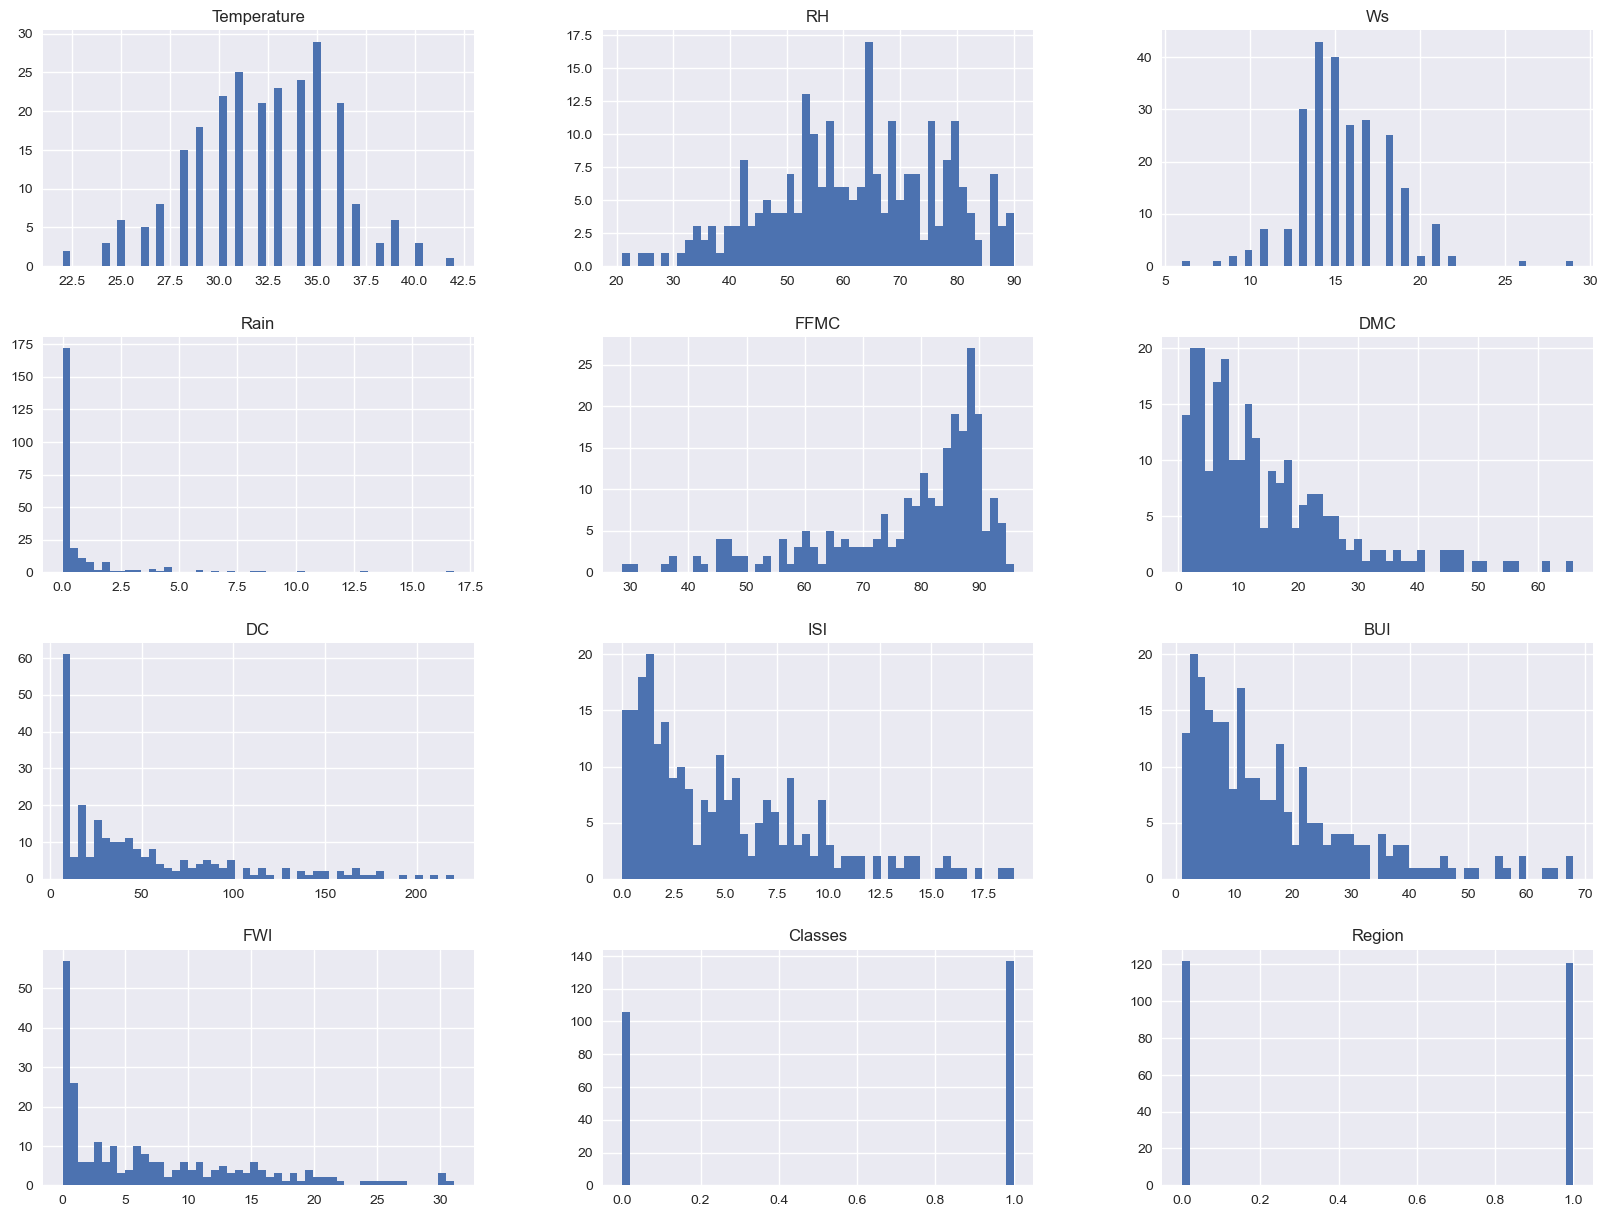

In [43]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

#### percentage for pie chart

In [44]:
percentage= df_copy['Classes'].value_counts(normalize=True)*100

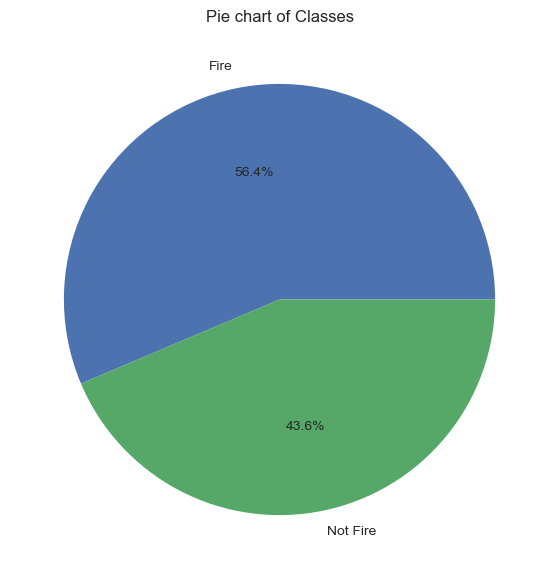

In [45]:
classlabel =['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabel,autopct='%1.1f%%')
plt.title('Pie chart of Classes')
plt.show()

In [46]:
#correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

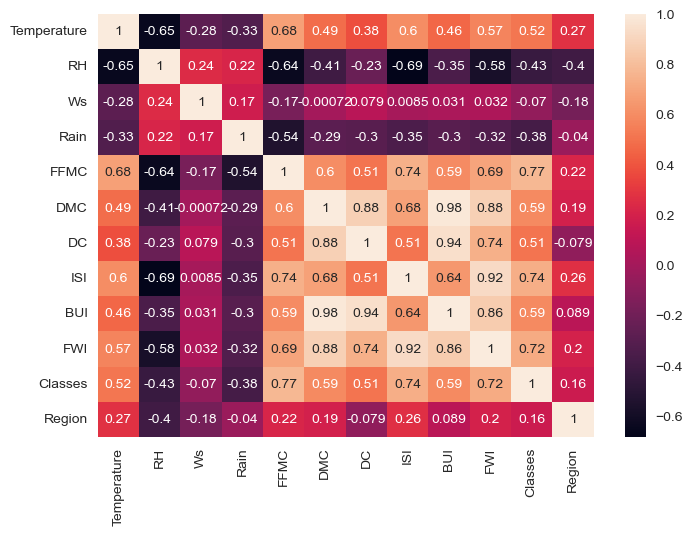

In [47]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: >

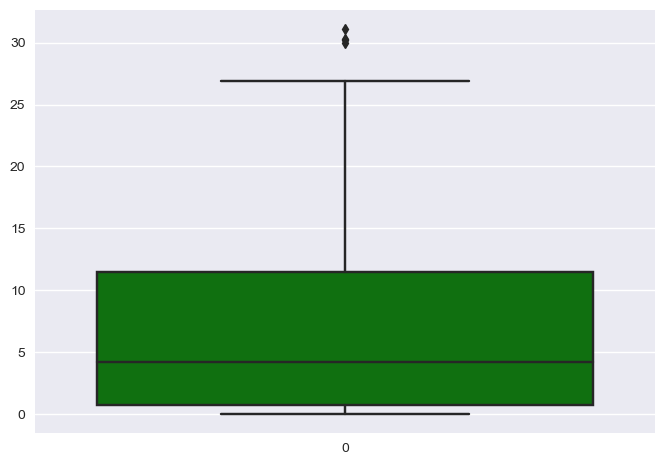

In [48]:
sns.boxplot(df_copy['FWI'],color='green')

In [49]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int32  
 2   month        243 non-null    int32  
 3   year         243 non-null    int32  
 4   Temperature  243 non-null    int32  
 5   RH           243 non-null    int32  
 6   Ws           243 non-null    int32  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int32  
dtypes: float64(7), int32(7), int64(1), object(1)
memory usage: 23.9+ KB


In [51]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire analysis of Sidid - Bel Region')

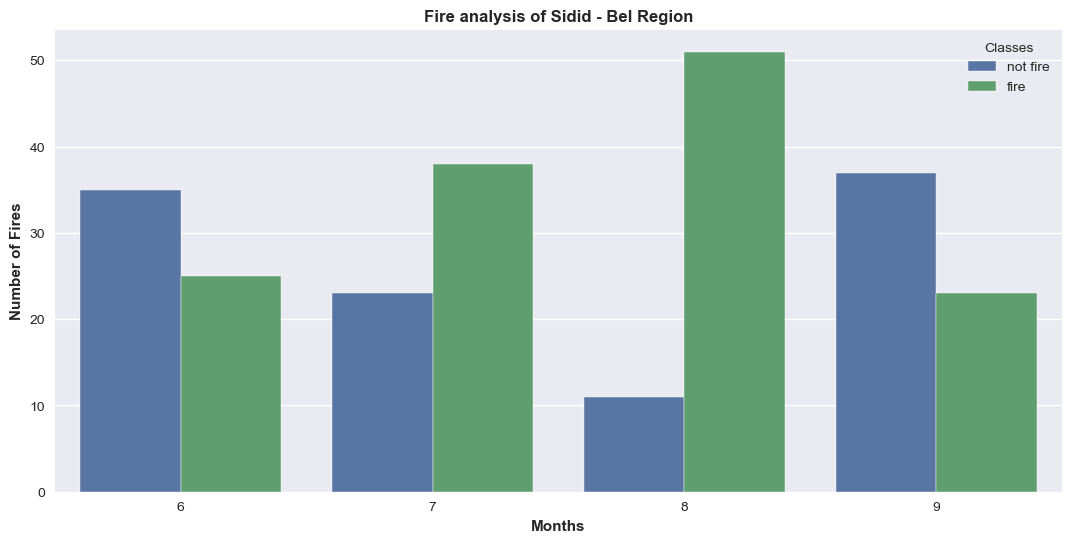

In [52]:
# monthly fire analytics

dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire analysis of Sidid - Bel Region",weight='bold')

Text(0.5, 1.0, 'Fire analysis of Brjaia Region')

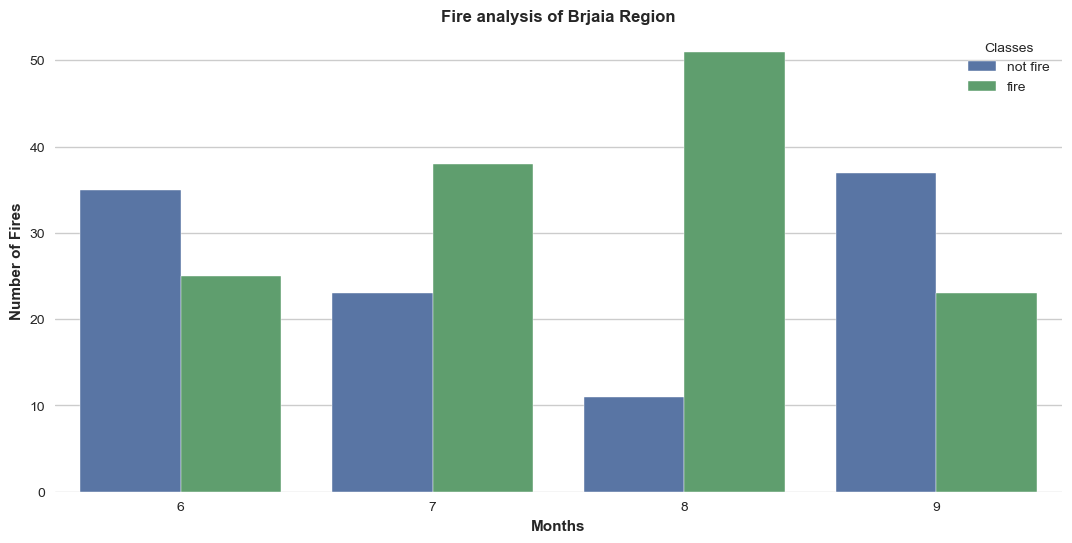

In [53]:
# monthly fire analytics

dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire analysis of Brjaia Region",weight='bold')

#### It is observerd that August and september had the most number of forest fire for both region. And from the above plot of months, we can understand few 

#### Most of the fires happened in August and very high fires happened in only 3 month - june, july and august 

#### less fire was on september

In [54]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [55]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [56]:
# Independent and Dependent featue

x= df_copy.drop('FWI',axis=1)
y= df_copy['FWI']

In [57]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [58]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [59]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [60]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

In [61]:
# feature selection based on correlation

x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

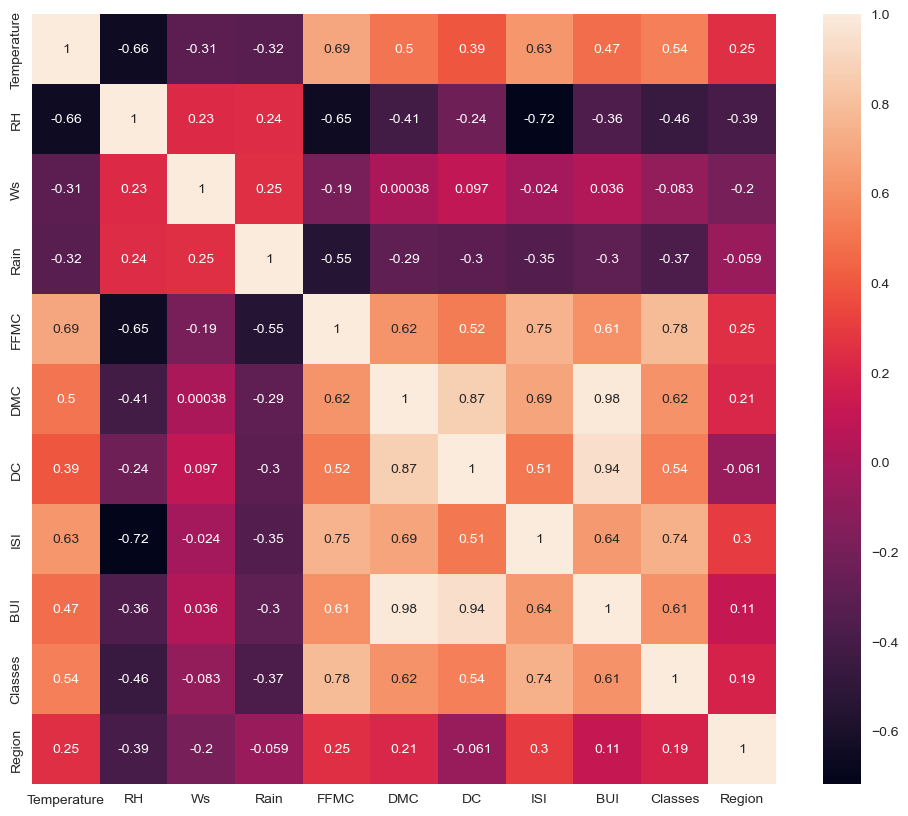

In [62]:
#check for multicollinearity

plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [63]:
def correlation(dataset,thresold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thresold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [64]:
# thresold-- Domain expert

corr_features = correlation(x_train,0.85)

In [65]:
corr_features

{'BUI', 'DC'}

In [66]:
# drop feature when correlation is more than 0.85

x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

#### Feature Scaling Or Standardization

In [67]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [68]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [69]:
x_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

#### Box plot to understand effect of standardscaler

Text(0.5, 1.0, 'x_train after scaling')

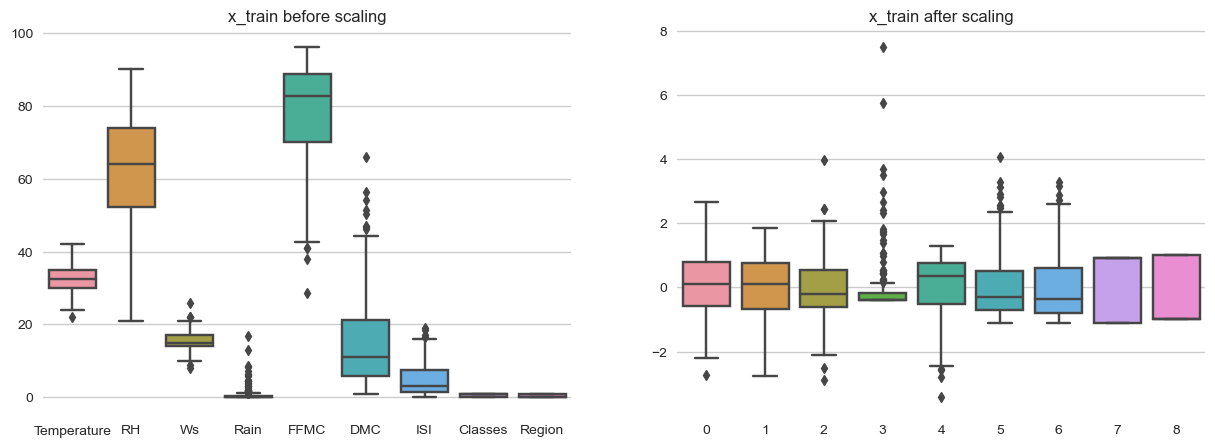

In [70]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scaling")

### Linear Regression Model

In [71]:
# pip install jupyter-tabnine---to autocomplete

Mean Absolute Error: 0.5468236465249977
R2- Score:  0.9847657384266952


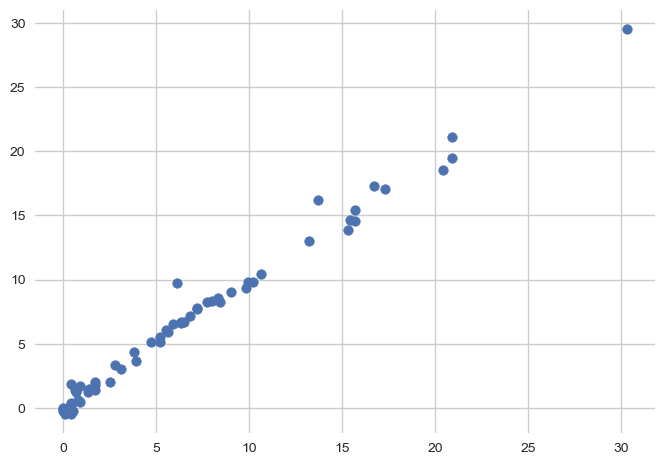

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()

linreg.fit(x_train_scaled,y_train)

y_pred = linreg.predict(x_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2- Score: ",score)

plt.scatter(y_test,y_pred)

### Lasso Regression

Mean Absolute Error: 1.1331759949144087
R2- Score:  0.9492020263112388


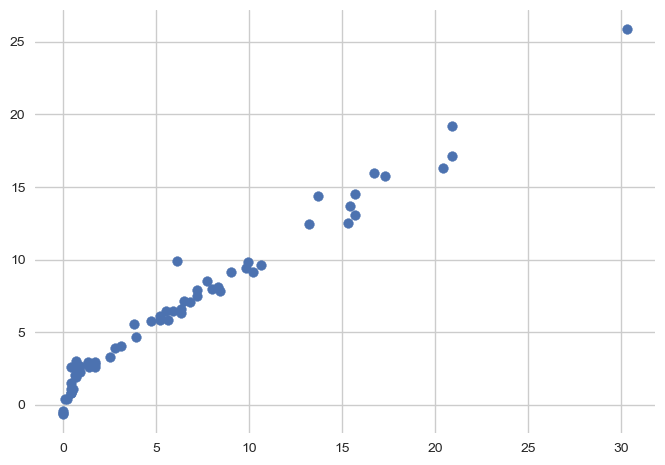

In [75]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2- Score: ",score)

plt.scatter(y_test,y_pred)

### Cross - Validation Lasso

In [87]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [88]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [77]:
lassocv.alpha_

0.05725391318234411

In [78]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [79]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error: 0.6199701158263436
R2- Score:  0.9820946715928274


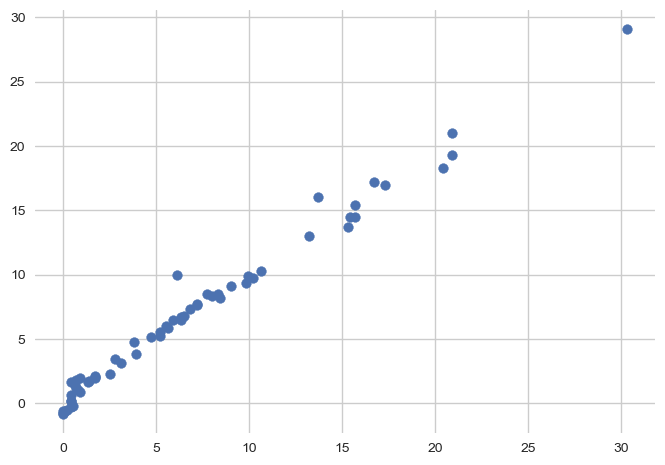

In [80]:
y_pred = lassocv.predict(x_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2- Score: ",score)

plt.scatter(y_test,y_pred)

### Ridge Regression

Mean Absolute Error: 0.5642305340105683
Mean Squared Error: 0.6949198918152052
R2- Score:  0.9842993364555513


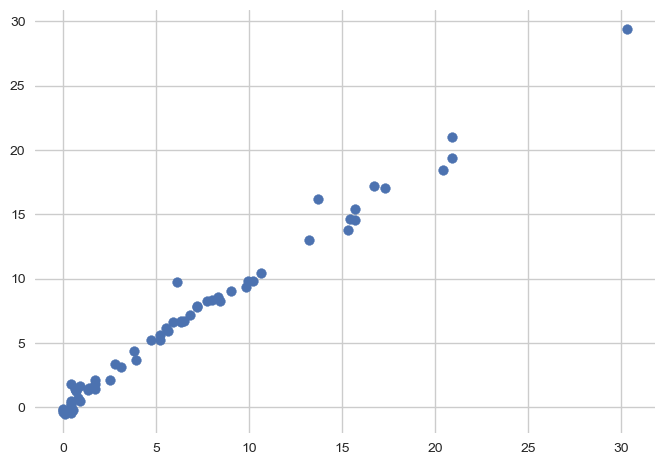

In [83]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2- Score: ",score)

plt.scatter(y_test,y_pred)

### Cross Validation Ridge

Mean Absolute Error: 0.5642305340105683
R2- Score:  0.9842993364555513


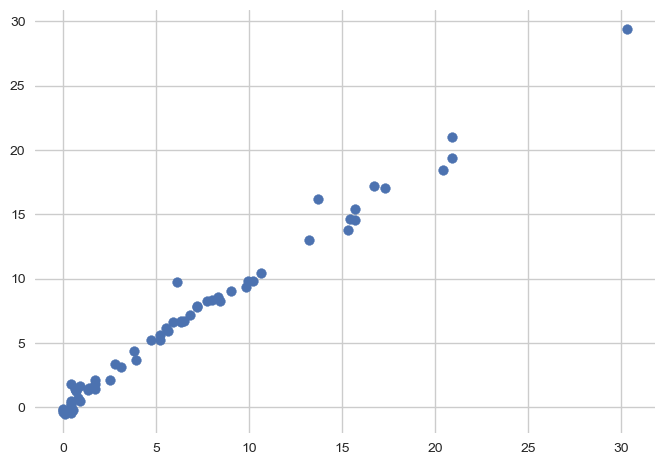

In [84]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)

y_pred = ridgecv.predict(x_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2- Score: ",score)

plt.scatter(y_test,y_pred)

In [86]:
# to see how much parameter is got selected 
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Elastic net Regression

Mean Absolute Error: 1.8822353634896
Mean Squared Error: 5.5172511010252245
R2- Score:  0.8753460589519703


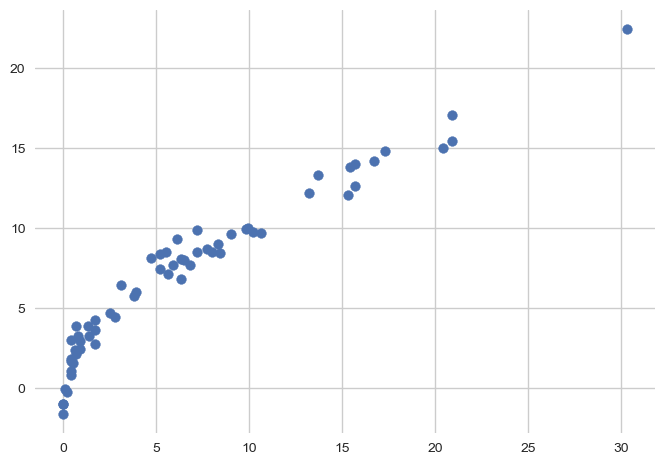

In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred = elasticnet.predict(x_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2- Score: ",score)

plt.scatter(y_test,y_pred)

### Cross- Validation Elastic Net 

Mean Absolute Error: 0.6575946731430902
R2- Score:  0.9814217587854941


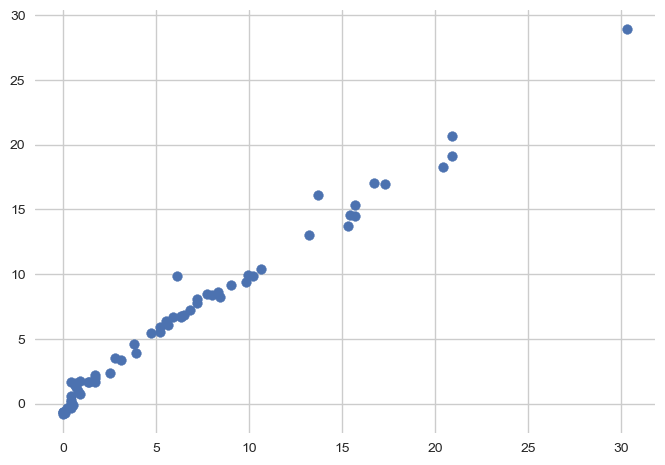

In [90]:
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)

y_pred = elasticcv.predict(x_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2- Score: ",score)

plt.scatter(y_test,y_pred)

### Pickle the machine learning model and pre-processing model for StandardScaler

### we use this for deployment

In [91]:
scaler

StandardScaler()

In [92]:
ridge  # selecting ridge because it is having better accuracy we can select other also 

Ridge()

In [94]:
import pickle 

pickle.dump(scaler,open('scaler.pkl','wb'))

pickle.dump(ridge,open('ridge.pkl','wb'))


### web application and deployment is remain in this project 